Laboratorio 7

- Cristopher Barrios
- Sebastian Recinos
- Jorge Perez

In [63]:
#Importando libs
import numpy as np
from glob import glob
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm
import pandas as pd
import cv2
from PIL import Image
from statistics import mode
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics, model_selection

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-Procesamiento

In [65]:
#Importando dataset
data_dict = {'Adialer.C': [], 
             'Agent.FYI': [], 
             'Allaple.A': [], 
             'Allaple.L': [], 
             'Alueron.gen!J': [], 
             'Autorun.K': [], 
             'C2LOP.gen!G': [], 
             'C2LOP.P': [], 
             'Dialplatform.B': [], 
             'Dontovo.A': [], 
             'Fakerean': [], 
             'Instantaccess': [], 
             'Lolyda.AA1': [], 
             'Lolyda.AA2': [], 
             'Lolyda.AA3': [], 
             'Lolyda.AT': [], 
             'Malex.gen!J': [], 
             'Obfuscator.AD': [], 
             'Rbot!gen': [], 
             'Skintrim.N': [], 
             'Swizzor.gen!E': [], 
             'Swizzor.gen!I': [], 
             'VB.AT': [], 
             'Wintrim.BX': [], 
             'Yuner.A': []}

for i in data_dict:
    try:
        data_dict[i] = glob('/content/drive/MyDrive/Lab7sds/malimg_paper_dataset_imgs/' + i + '/*.png')
        print(i, ': ', len(data_dict[i]))
    
    except:
        print('ERROR en ', i)

for i in data_dict:
    for j in range(len(data_dict[i])):
        
        data_dict[i][j] = data_dict[i][j].replace("\\", '/')

Adialer.C :  122
Agent.FYI :  116
Allaple.A :  2949
Allaple.L :  1591
Alueron.gen!J :  198
Autorun.K :  106
C2LOP.gen!G :  0
C2LOP.P :  146
Dialplatform.B :  177
Dontovo.A :  162
Fakerean :  381
Instantaccess :  431
Lolyda.AA1 :  213
Lolyda.AA2 :  184
Lolyda.AA3 :  123
Lolyda.AT :  159
Malex.gen!J :  136
Obfuscator.AD :  142
Rbot!gen :  158
Skintrim.N :  80
Swizzor.gen!E :  128
Swizzor.gen!I :  132
VB.AT :  408
Wintrim.BX :  97
Yuner.A :  800


In [66]:
#Extrayendo media de longitudes mayores a 100 y menores a 200

count = 0
lengths_count = 0

for i in data_dict:
    l = len(data_dict[i])
    if l > 100 and l < 200:
        count += 1
        lengths_count += l

l_mean = int(round(lengths_count/count))

print(count)
print(l_mean, '<----------------- numero de datos a los que se acortaran los mayores a 200')

15
146 <----------------- numero de datos a los que se acortaran los mayores a 200


Extrayendo datos de tamaño de imagenes

In [67]:
shape_list = []
for i in data_dict:
    for j in range(len(data_dict[i])):
        im = cv2.imread(data_dict[i][j])
        shape_list.append(im.shape)
    


length = 0
width = 0
l_length = []
l_width = []

for i in shape_list:
    length += i[0]
    l_length.append(i[0])
    width += i[1]
    l_width.append(i[1])

print('Width min: ', min(l_width))
print('Width max: ', max(l_width))
print('Length min: ', min(l_length))
print('Length max: ', max(l_length))
print('Width mean: ', int(round(width/len(shape_list))))
print('Length mean: ', int(round(length/len(shape_list))))
print('Width mode: ', mode(l_width))
print('Length mode: ', mode(l_length))
print(type(im))

Width min:  64
Width max:  1024
Length min:  208
Length max:  5334
Width mean:  327
Length mean:  428
Width mode:  256
Length mode:  452
<class 'numpy.ndarray'>


Emparejando datos

In [68]:
#Se eliminaran los datos menores a 100

to_delete = []

for i in data_dict:
    l = len(data_dict[i])
    if l < 100:
        to_delete.append(i)

print('Classes to remove: ', to_delete)

print(len(data_dict))

for i in to_delete:
    data_dict.pop(i)

print(len(data_dict))

Classes to remove:  ['C2LOP.gen!G', 'Skintrim.N', 'Wintrim.BX']
25
22


In [69]:
#Se acortaran los datos mayores a 200 a la media anteriormente calculada

for i in data_dict:
    l = len(data_dict[i])
    if l > 200:
        indexes_size = l - l_mean
        del_list = []

        for j in range(indexes_size):
            x = randint(0, (l - 1))
            if x not in del_list:
                del_list.append(x)
            
            else:
                dupped = True
                
                while dupped:
                    x = randint(0, (l - 1))
                    if x not in del_list:
                        del_list.append(x)
                        dupped = False
        
        for j in sorted(del_list, reverse=True): 
            del data_dict[i][j]

for i in data_dict:
    print(i, ': ', len(data_dict[i]))




Adialer.C :  122
Agent.FYI :  116
Allaple.A :  146
Allaple.L :  146
Alueron.gen!J :  198
Autorun.K :  106
C2LOP.P :  146
Dialplatform.B :  177
Dontovo.A :  162
Fakerean :  146
Instantaccess :  146
Lolyda.AA1 :  146
Lolyda.AA2 :  184
Lolyda.AA3 :  123
Lolyda.AT :  159
Malex.gen!J :  136
Obfuscator.AD :  142
Rbot!gen :  158
Swizzor.gen!E :  128
Swizzor.gen!I :  132
VB.AT :  146
Yuner.A :  146


Reshaping images

In [70]:
df_dict = {'Adialer.C': [], 
             'Agent.FYI': [], 
             'Allaple.A': [], 
             'Allaple.L': [], 
             'Alueron.gen!J': [], 
             'Autorun.K': [], 
             'C2LOP.gen!G': [], 
             'C2LOP.P': [], 
             'Dialplatform.B': [], 
             'Dontovo.A': [], 
             'Fakerean': [], 
             'Instantaccess': [], 
             'Lolyda.AA1': [], 
             'Lolyda.AA2': [], 
             'Lolyda.AA3': [], 
             'Lolyda.AT': [], 
             'Malex.gen!J': [], 
             'Obfuscator.AD': [], 
             'Rbot!gen': [], 
             'Swizzor.gen!E': [], 
             'Swizzor.gen!I': [], 
             'VB.AT': [],
             'Yuner.A': []}

for i in data_dict:
    image_list = []
    for j in range(len(data_dict[i])):
        im = cv2.imread(data_dict[i][j])
        im = cv2.resize(im, (512, 512))
        image_list.append(im)
    
    df_dict[i] = image_list

Plotteando una imagen por cada falimia de malware

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


IndexError: ignored

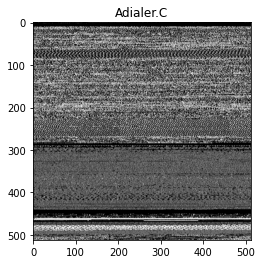

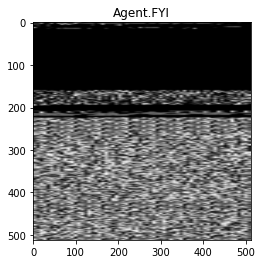

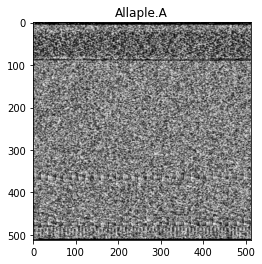

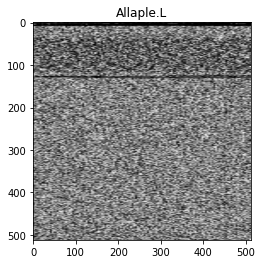

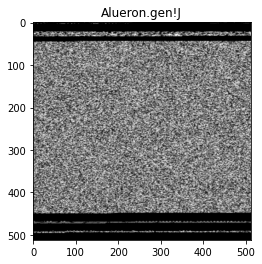

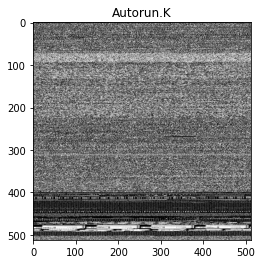

In [71]:
x = randint(0, 100)

images = []

for i in df_dict:
    img = df_dict[i][x]
    plt.figure()
    plt.title(i)
    plt.imshow(img)
    print(img.shape)

Conviertiendo diccionario a dataframe

In [72]:
data = dict()
label_list = []
im_list = []
for i in df_dict:
    for j in df_dict[i]:
        label_list.append(i)
        im_list.append(j)

data['Label'] = label_list
data['Image'] = im_list

df = pd.DataFrame.from_dict(data)

print(df.head())

       Label                                              Image
0  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
1  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
2  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
3  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
4  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...


In [73]:
print(type(df['Image'][0]))
print(len(df))
print(df.head(10))

<class 'numpy.ndarray'>
3211
       Label                                              Image
0  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
1  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
2  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
3  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
4  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
5  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
6  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
7  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
8  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...
9  Adialer.C  [[[77, 77, 77], [90, 90, 90], [144, 144, 144],...


In [74]:
#Guardando en pickle
df.to_pickle('/content/drive/MyDrive/Lab7sds/1/dataframe.pkl')

Creando Modelo

In [75]:
model = keras.Sequential()

#Input Layer
model.add(layers.Conv2D(64, (3, 1), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((1, 1)))
#Layer 2
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
#Final Layer
model.add(layers.Dense(64, activation='relu'))




In [76]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 510, 512, 64)      640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 510, 512, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 510, 512, 64)      4160      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 510, 512, 64)     0         
 g2D)                                                            
                                                                 
 dense_11 (Dense)            (None, 510, 512, 64)      4160      
                                                                 
Total params: 8,960
Trainable params: 8,960
Non-traina

In [77]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)



Separando data

In [78]:
target = df['Label']
feature_matrix = df['Image']

#print('Final features:', feature_matrix.columns)
feature_matrix.head()

#División de datos de entrenamientos y prueba
X_train, X_score, y_train, y_score = model_selection.train_test_split(feature_matrix, target, test_size=0.30, random_state=31)


In [79]:
X_train = np.array([np.array(val) for val in X_train])

Entrenando Modelo

In [80]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10


UnimplementedError: ignored